In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [133]:
mean_a = np.array([-1, -1])
mean_b = np.array([1, -1])
mean_c = np.array([0, 1])

cov_a = np.array([[2, 0.5], [0.5, 1]])
cov_b = np.array([[1, -0.5], [-0.5, 2]])
cov_c = np.array([[1, 0], [0, 2]])

cov_coef = [0.5, 1, 2, 4, 8]

In [154]:
for k in cov_coef:
    x_a, y_a = np.random.multivariate_normal(mean_a, k * cov_a, 100).T
    x_b, y_b = np.random.multivariate_normal(mean_b, k * cov_b, 100).T
    x_c, y_c = np.random.multivariate_normal(mean_c, k * cov_c, 100).T
    x = np.concatenate((x_a, x_b, x_c))
    y = np.concatenate((y_a, y_b, y_c))

    X = np.vstack((x, y)).T

    kmeans = KMeans(init="k-means++", n_clusters=3, n_init=5, max_iter=300).fit(X)

    gm = GaussianMixture(n_components=3, n_init=5)
    gm_labels = gm.fit_predict(X)

    print('sigma:', k)
    print('K-means clustering objective:', abs(kmeans.score(X)))
    print('GMM clustering objective:', gm.score(X))

    kmeans_count = 0
    gm_count = 0
    for i in range(0, 300, 100):
        _, counts = np.unique(kmeans.labels_[i : i + 100], return_counts=True)
        kmeans_count += np.amax(counts)

        _, counts = np.unique(gm_labels[i : i + 100], return_counts=True)
        gm_count += np.amax(counts)

    print(f'K-means cluster accuracy: ', kmeans_count / 300)
    print(f'GMM cluster accuracy: ', gm_count / 300)

sigma: 0.5
K-means clustering objective: 303.5463660528885
GMM clustering objective: -2.992559981427688
K-means cluster accuracy:  0.79
GMM cluster accuracy:  0.7666666666666667
sigma: 1
K-means clustering objective: 529.4038016773673
GMM clustering objective: -3.5454958318298972
K-means cluster accuracy:  0.7366666666666667
GMM cluster accuracy:  0.7166666666666667
sigma: 2
K-means clustering objective: 994.3413661251705
GMM clustering objective: -4.15952532002885
K-means cluster accuracy:  0.62
GMM cluster accuracy:  0.6
sigma: 4
K-means clustering objective: 1973.4744051942089
GMM clustering objective: -4.817435076895556
K-means cluster accuracy:  0.5933333333333334
GMM cluster accuracy:  0.59
sigma: 8
K-means clustering objective: 3403.263336052211
GMM clustering objective: -5.382152061362539
K-means cluster accuracy:  0.51
GMM cluster accuracy:  0.49


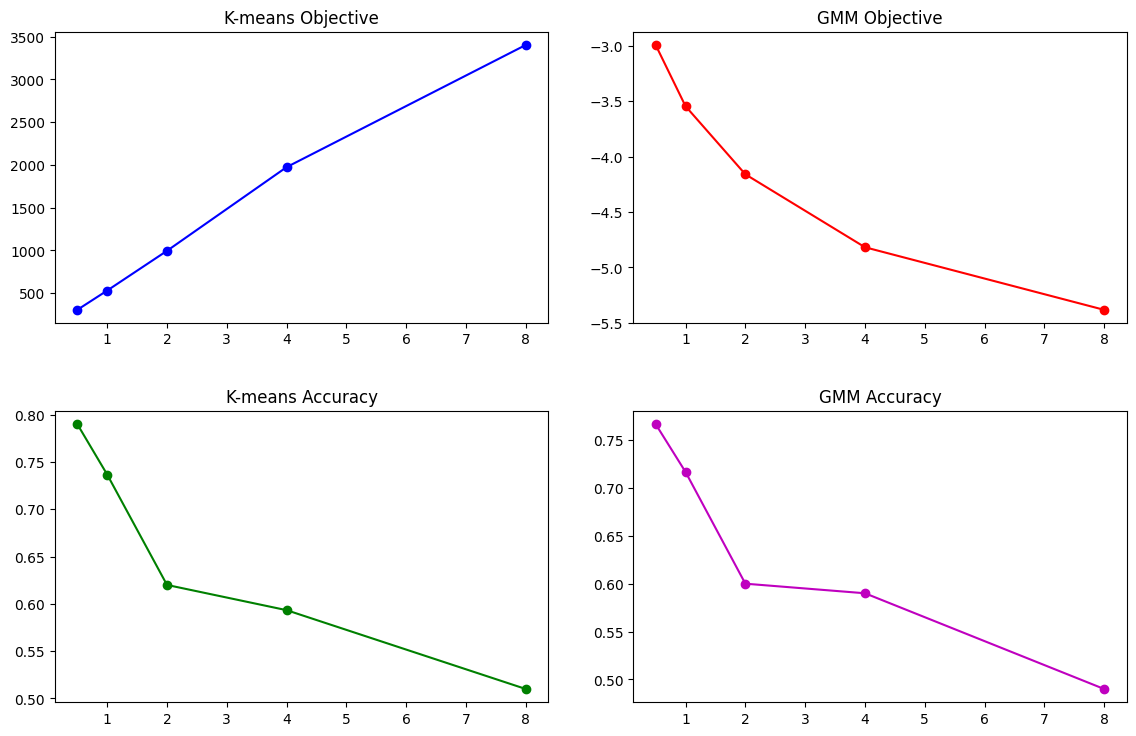

In [157]:
sigma = [0.5, 1, 2, 4, 8]
kmeans_obj = [303.5463660528885, 529.4038016773673, 994.3413661251705, 1973.4744051942089, 3403.263336052211]
gmm_obj = [-2.992559981427688, -3.5454958318298972, -4.15952532002885, -4.817435076895556, -5.382152061362539]
kmeans_acc = [0.79, 0.7366666666666667, 0.62, 0.5933333333333334, 0.51]
gmm_acc = [0.7666666666666667, 0.7166666666666667, 0.6, 0.59, 0.49]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(sigma, kmeans_obj, 'bo-')
axs[0, 0].set_title('K-means Objective')

axs[0, 1].plot(sigma, gmm_obj, 'ro-')
axs[0, 1].set_title('GMM Objective')

axs[1, 0].plot(sigma, kmeans_acc, 'go-')
axs[1, 0].set_title('K-means Accuracy')

axs[1, 1].plot(sigma, gmm_acc, 'mo-')
axs[1, 1].set_title('GMM Accuracy')

fig.tight_layout(pad=3.0)

plt.show()